# Números Aleatorios

En la unidad anterior se describio como primer paso de los experimentos de simulación, la selección de una fuente de números aleatorios y la obtención de los mismos. Por lo tanto, disponer de un buen generador de números aleatorios es fundamental en Simulación. De hecho, constituye también una parte fundamental en otras áreas, como la Informática (algoritmos aleatorizados, verificación de algoritmos, complejidad de algoritmos, criptografía, ...), la Estadística (métodos de muestreo y remuestreo, contrastes Montecarlo, Inferencia Bayesiana, ...), y, en general, en cualquier problema de cálculo científico que, de manera directa o indirecta, incluya algún elemento probabilístico incluyendo los juegos de video.

## ¿Porqué estudiar generadores de números aleatorios?

Actualmente existen multiples generadores de números aleatorios en diferentes entornos y compiladores lo cual supondría para un usuario de la Simulación que no es necesario su estudio. Sin embargo, estudios sobre algunos generadores comerciales sugieren que debemos actuar con cuidado con el uso de ellos. Incluso, el uso progresivo de modelos de simulación cada vez más detallados exige generadores de números aleatorios de mayor calidad.

##¿Cómo generar números aleatorios?

## ¿Cómo determinar si un generador de numeros aleatorios es apropiado?

##Pruebas o contrastes empíricos

Normalmente, pasaremos un conjunto de pruebas cuando introduzcamos un nuevo generador, o cuando deseamos analizar si un generador del que desconozcamos su algoritmo subyacente es suficientemente bueno para nuestros propósitos.


### Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F_n(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$



<img src="imgs/300px-KS_Example.png" width="30%" height="30%" >
<center>Figura. Ilustración del estadístico de Kolmogorov–Smirnov (K–S). La línea roja es una función de distribución acumulada (cumulative distribution function, CDF), la línea azul es una función empirica de distribución acumulada (empirical cumulative distribution function, ECDF), y la línea negra es el estadístico K–S. Imagen tomada de Wikipedia [https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test]</center>


##Ejemplo

In [36]:
%matplotlib inline 
#Agregado
import time
t = str(int(time.time()))
t = float(t[len(t)-4:len(t)])

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 100 #cantidad de números aleatorios a generar

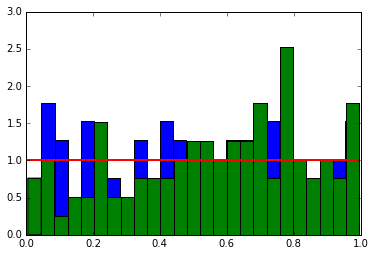

In [37]:
# Teoretical CDF for Uniform distribution F(x)
u = [1.0] * N
#print(u)

# Gerate random numbers with Uniform distribution f(x)
#np.random.seed(123456789)
x = np.random.uniform(0,1,N)

#Implementado
a=1013904223 #5.0 #NUMERICAL RECIPES
c=1664525 
m=2**32
i=0
y=[]
while(i<N):
    numero=float((a*t+c)%m)
    aleatorio=float(numero/m)
    t=numero
    y.append(aleatorio)
    i+=1
    
# Plot empirical distribution f(x)
k=25 #cantidad de clases, subintervalos o grados de libertad
count, bins, ignored = plt.hist(x, k, normed=True)
countt, binss, ignoredd = plt.hist(y, k, normed=True)
plt.figure(1)
#plt.subplot(121)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
#plt.subplot(122)
#plt.plot(binss, np.ones_like(binss), linewidth=2, color='k')

plt.show()

('De = ', 0.25355694502963827)
('De2 = ', 0.05660495866099291)


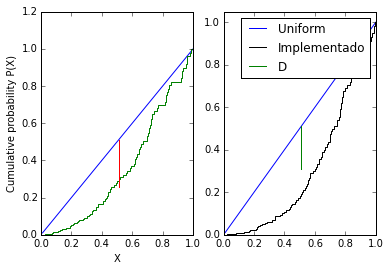

In [38]:
x1 = np.arange(1.0/N,1+1.0/N,1.0/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

#Implementado
x4 = np.sort(y)
y4 = np.cumsum(np.sort(y)/np.max(np.cumsum(y)))

De=np.absolute(y2-y1)
print("De = ",np.max(De))
De2=np.absolute(y2-y4)
print("De2 = ",np.max(De2))


# Plotting
plt.figure(1)
plt.subplot(121)
plt.plot(x1,y1,label='Uniform')
plt.xlabel('X')
plt.ylabel('Cumulative probability P(X)')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

# Plotting implementado
plt.subplot(122)
plt.plot(x1,y1,label='Uniform')
plt.step(x4,y4,label='Implementado', color="k")
x5 = [x1[De.argmax()],x1[De.argmax()]]
y5 = [np.min([y1[De.argmax()],y4[De.argmax()]]),np.max([y1[De.argmax()],y4[De.argmax()]])]
plt.step(x5,y5,label='D')

#plt.plot(x1,De,label='De')

plt.legend()

#plt.title('arbitrary')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()


In [39]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print("D = ", D)
print("p-value = ", pvalue)

D1,pvalue1 = stats.kstest(y4, 'uniform')
print "D = ", D1 ," valor por generador implementado"
print "p-value = ", pvalue1


('D = ', 0.25355694502963805)
('p-value = ', 3.7341665877210772e-06)
D =  0.201652577315  valor por generador implementado
p-value =  0.000484573998673


### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.

##Ejemplo

In [40]:
#e sub i=n/k, n es el número aleatorios generados, en este caso 100; k es el número de particiones o clases (25)
esperado = float(N)/k
intervalo = 1.0/k
#print esperado, intervalo, x2

def congruencialMixto(a,c,x,m):
    """a=1013904223 #5.0
    c=1664525 #4.0
    #x=5
    m=2**32 #8.0"""
    generados=[]
    j = 0
    while(j < N):
        numero = float((a*x + c) % m)
        aleatorio = float(numero / m)
        x=numero
        generados.append(aleatorio)
        j += 1
    return generados

def pearson(arreglo):
    x=[]
    x=np.sort(arreglo)
    observado = []
    clase = 1
    pearson = 0
    pearson2 = 0
    suma = 0
    rango = clase * intervalo
    i=0
    while i < N:
        if x[i] <= rango: #x2 está ordenado de menor a mayor, son los valores del random python
            observado.append(x[i])
            i = i + 1
        else:
            #print len(observado)#, observado, i
            suma = suma + len(observado)
            pearson = ((len(observado) - esperado)**2 / (esperado)) + pearson
            clase = clase + 1
            rango = clase * intervalo
            #print "siguiente rango: ", rango,(clase-1)*intervalo, sumatoria
            observado = []

    pearson = ((len(observado) - esperado)**2 / (esperado)) + pearson1
    return pearson
        
implementado = []
implementado = congruencialMixto(1013904223,1664525,t,2**32)
randu = []
randu = congruencialMixto(65539,0,t,2**31)
SinclairZX81 = []
SinclairZX81 = congruencialMixto(75,0,t,2**16+1)
BorlandCC = []
BorlandCC = congruencialMixto(22695477,1,t,2**32)
print "generador numpy: ",pearson(x2), " generador implementado (numerical recipes): ", pearson(implementado)
print "generador randu: ",pearson(randu), " generador Sinclair ZX81: ", pearson(x4)
print "generador Borland C - C++: ", pearson(BorlandCC)

generador numpy:  0.25  generador implementado (numerical recipes):  1.0
generador randu:  0.0  generador Sinclair ZX81:  2.25
generador Borland C - C++:  0.25


##Conclusiones sobre contraste o prueba  $\chi^{2}$

Con un grado de libertad de k=25 y una cantidad muestral de datos n=100, comparando el resultado de la prueba con la tabla de distribución $\chi^{2}$ y un nivel de significación del 5 % o más, obtenemos un valor para la prueba de contraste o chi cuadrado aceptable, para todos los generadores de variables aleatorias, entre [0,1] que son numpy, el congruencial mixto empleando los parámetros de el método: randu, numerical recipes, Sinclair ZX81 y Borland C - C++, se obtiene un valor aceptable respecto a 

### Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

###Contraste de rachas por encima y por debajo de la mediana

Otro procedimiento para definir rachas se tiene del recuento de observaciones que se sitúan a un mismo lado de la mediana. La distribución asintótica del número de rachas, bajo la hipótesis de aleatoriedad, es:

$$N\left(1+\frac{n}{2},\frac{n}{2}\right)$$

de donde se sigue, inmediatamente una prueba.

###Contraste o prueba de permutaciones

Separamos las observaciones en $k$-uplas:

$$(U_1,U_2,...,U_k),...,(U_{ik+1},U_{ik+2},...,U_{(i+1)k}),...$$

La $k$-upla general se escribe:

$$(U_{ik+j})_{j=1}^k$$

La ordenamos crecientemente y consideramos la ordenación correspondiente de los subíndices $j$. Bajo la hipótesis de que la probabilidad de que dos números sean iguales es nula, hay $k!$ ordenaciones posibles. Bajo la hipótesis de independencia, todas las permutaciones son equiprobables, con probabilidad $1/k!$. Entonces es inmediato aplicar una prueba $\chi^2$ con $k!$ clases, distribución asintótica $\chi_{k!-1}^2$, frecuencias esperadas $r/k!$, onde $r$ es el número de $k$-uplas y frecuencias observadas el número de veces que aparece cada ordenación.

### Contraste o prueba de huecos

Fijamos dos valores $\alpha$ y $\beta$ con $0<\alpha<\beta<1$. La sucesión presenta un hueco de longitud $m$ si $U_j, U_{j+m}\in\left[\alpha,\beta\right]$ pero $U_{j+1},...,U_{j+m+1}\notin\left[\alpha,\beta\right]$. Bajo la hipótesis de aleatoriedad de la serie, la longitud $m$ de los huecos sigue una distribución geométrica de parámetro $P(\alpha\leq X_{j}\leq\beta)=\beta-\alpha=\rho$, es decir:

$$P(hueco\: longitud\: m)=\rho(1-\rho)^{m-1}$$.

La hipótesis de aleatoriedad implica independencia de las longitudes de los huecos y podemos aplicar una prueba $\chi^2$ basado en las comparacioens de los números observados y esperados de huecos de longitud $m$.

###Repetición de contrastes o pruebas

Para aumentar su potencia, los contrastes anteriores pueden repetirse $N$ veces. La distribución empírica de los valores del estadístico pueden compararse con su distribución teórica mediante, por ejemplo, el contraste de Kolmogorov-Smirnov.

#T3: Taller 3. Ejercicios
* Tomando como base éste Notebook, implementar los contrastes o pruebas de Kolmogorov-Smirnov, $\chi^2$, rachas, permutaciones y huecos en la sección correspondiente para evaluar la calidad de cualquier secuencia de números obtenidas por un generador de números aleatorios $U(0,1)$ utilizando tanto el generador de numpy como el implementado por Ud previamente.
* Evaluar la calidad de los siguientes generadores de números aleatorios usando las pruebas implementadas en el punto anterior:
    * RANDU $x_{i+1}=65539 x_i \mod 2^{31}$
    * Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$
    * Numerical reciepes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$
    * Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$
* Elabore un reporte en $\LaTeX$ con formato de artículo científico usando OverLeaf (URL: https://www.overleaf.com/) describiendo la teoría principal, la metodología usada, presentando los resultados (incluyendo graficas), realizando un análisis y discusión de los resultados, finalizando con las principales conclusiones.

#Referencias

[Ríos, Ríos & Martín, 2000] David Ríos, Sixto Ríos, Jacinto Martín. Simulación, Métodos y aplicaciones. Editorial Alfaomega, 2000.